# Trabajo Practico 2 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 -

### Consigna 2 -


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

3.99999301990713


In [3]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [4]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [5]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

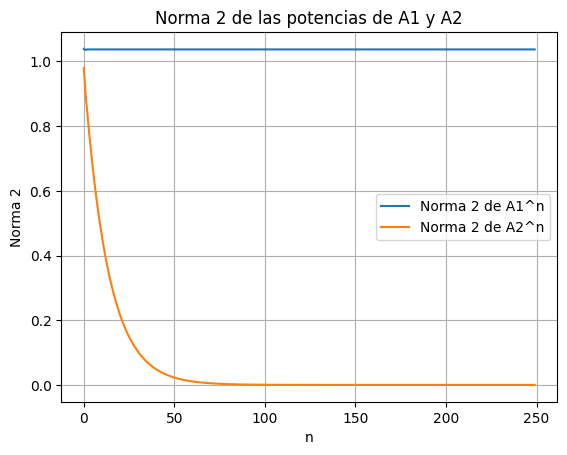

In [6]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [7]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i] = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar

In [8]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 :{a1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A12 :{a2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 :0.9999995864750344
autovalor más grande de A12 :0.9276513396037754


### Consigna 4 -


In [20]:
#Utilizamos nuevamente las matrices del ejercicio 2:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)



La ecuacion (4) es : (I − A)^−1 = I + A + A^2 + A^3 + . . . + A^n + . . . (despues lo escribo bien con latex)

In [24]:
#para n = 10
n10 = 10

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n10+1)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)

    return v

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


serie_de_potencias(A1,n10)

serie_de_potencias(A1,100)


IndexError: index 11 is out of bounds for axis 0 with size 11